<br>
<h1 style = "font-size:50px; font-family:Times New Roman ; font-weight : bold; background-color: #f1f5f8 ; color : #ff0000; text-align: center; border-radius: 120px 120px;">Prediction of Loan Status using Regression Models</h1>
<br>

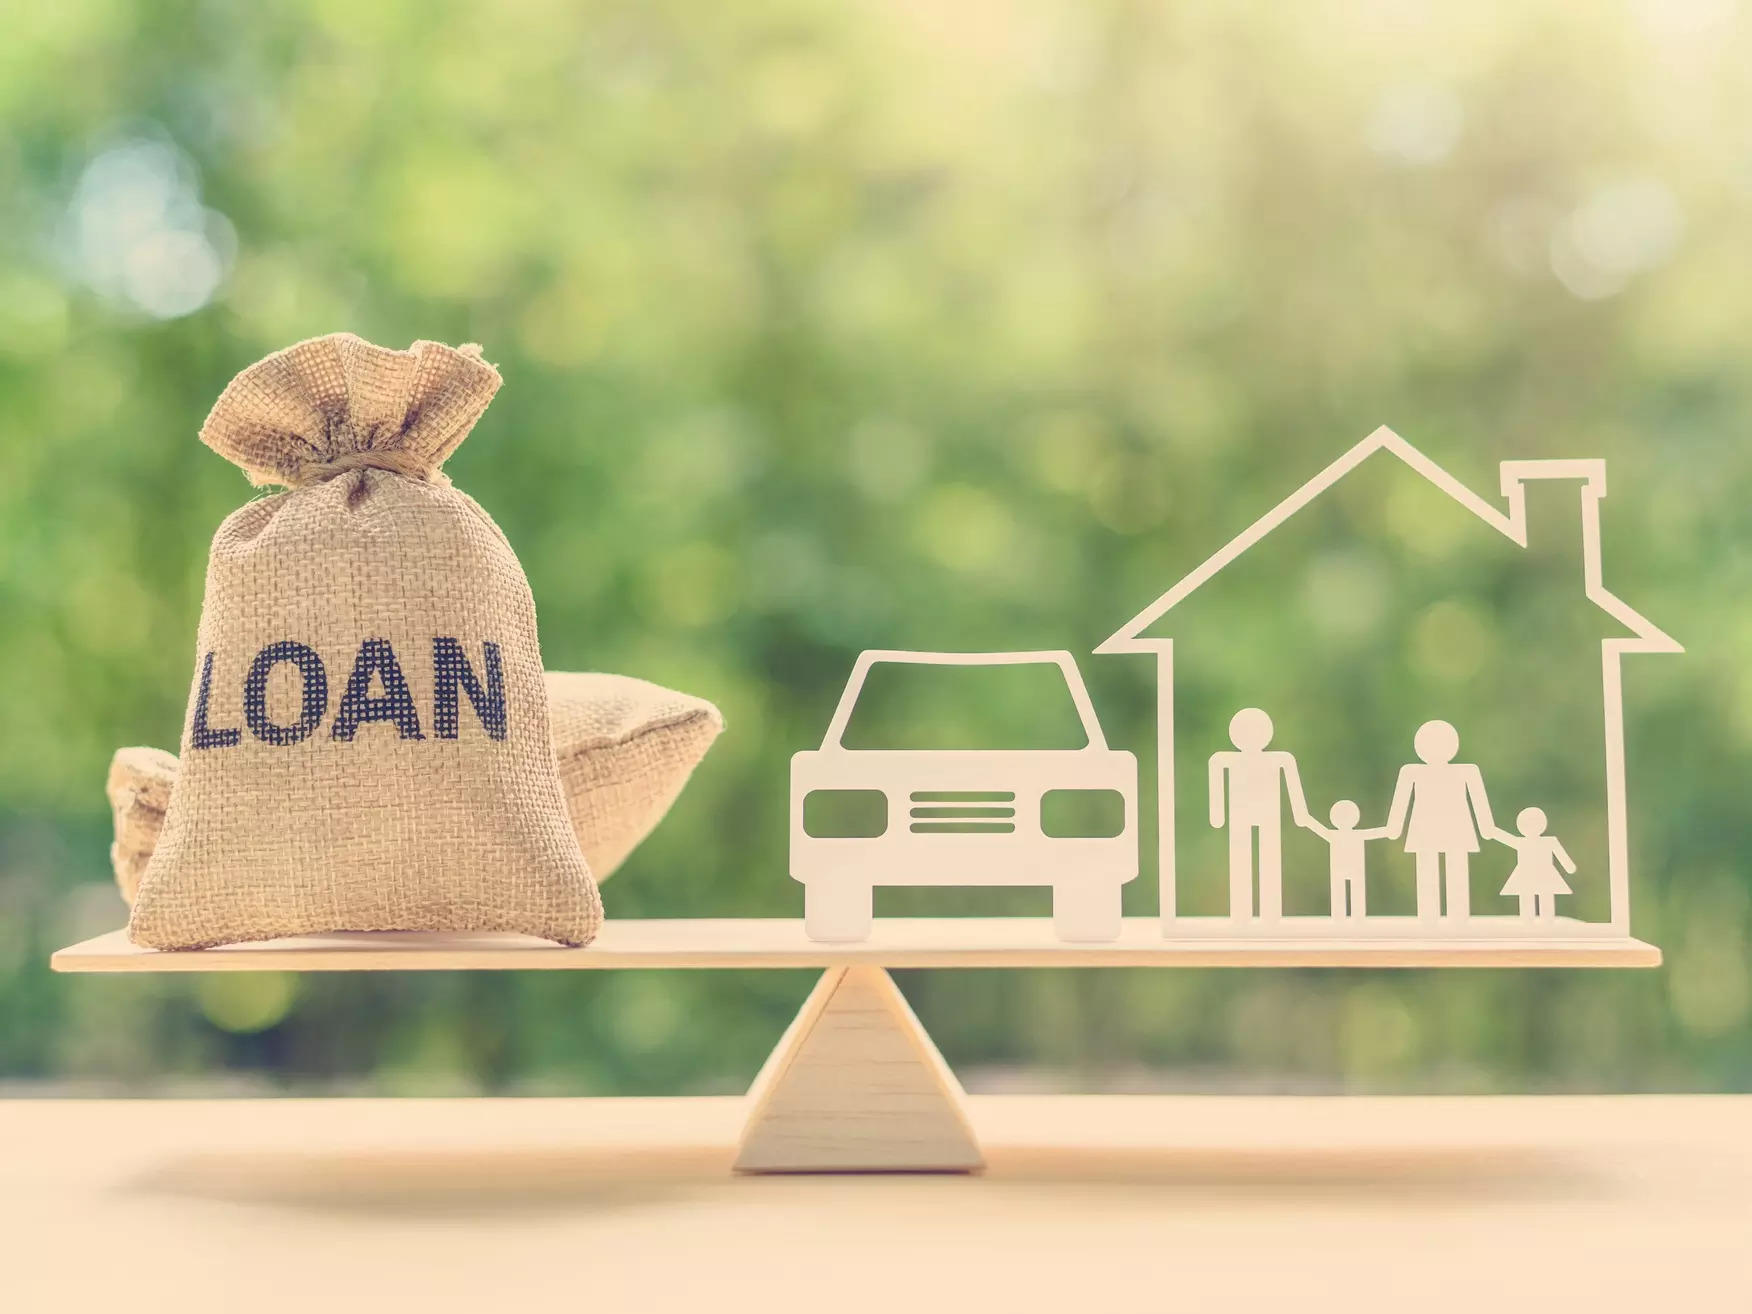

<br>
<h1 style = "font-size:50px; font-family:Times New Roman ; font-weight : medium; background-color: #f1f5f8 ; color : #ff0000; text-align: center; border-radius: 120px 120px;">Introduction</h1>
<br>

***In this dataset we have been provided with a number of parameters which will help us to predict what the loan status is - Yes or No as given in the training data set.***

**The parameters provided to us are:** 
* Loan ID
* Gender
* Married
* Dependents (Number of family members)
* Education
* Self Employed
* Applicant Income
* Co-applicant Income
* Loan Amount
* Loan Amount Term
* Credit History
* Loan Status
* Property Area

<br>
<h1 style = "font-size:50px; font-family:Times New Roman ; font-weight : medium; background-color: #f1f5f8 ; color : #ff0000; text-align: center; border-radius: 120px 120px;">Importing Python Libraries</h1>
<br>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<br>
<h1 style = "font-size:50px; font-family:Times New Roman ; font-weight : medium; background-color: #f1f5f8 ; color : #ff0000; text-align: center; border-radius: 120px 120px;">Reading and Analyzing the Files</h1>
<br>

In [2]:
df=pd.read_csv('/Users/ayushsingh/Downloads/train_loan-prediction.csv.xls')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


<br>
<h1 style = "font-size:50px; font-family:Times New Roman ; font-weight : medium; background-color: #f1f5f8 ; color : #ff0000; text-align: center; border-radius: 120px 120px;">Data Cleaning</h1>
<br>

<AxesSubplot:>

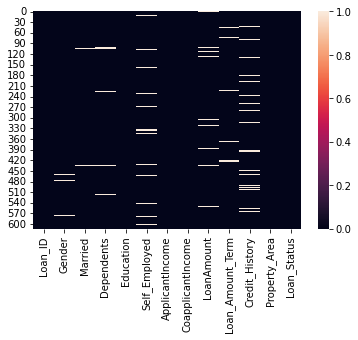

In [4]:
sns.heatmap(df.isnull())

In [5]:
df.drop(['Loan_ID'], axis=1, inplace=True)

In [6]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
df.shape

(614, 12)

In [8]:
df.dropna(axis=0, inplace=True)

In [9]:
df.shape

(480, 12)

In [10]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [11]:
df['Gender'].replace(to_replace='Male', value=0, inplace=True)
df['Gender'].replace(to_replace='Female', value=1, inplace=True)
df['Education'].replace(to_replace='Graduate', value=0, inplace=True)
df['Education'].replace(to_replace='Not Graduate', value=1, inplace=True)
df['Self_Employed'].replace(to_replace='Yes', value=1, inplace=True)
df['Self_Employed'].replace(to_replace='No', value=0, inplace=True)
df['Property_Area'].replace(to_replace='Rural', value=0, inplace=True)
df['Property_Area'].replace(to_replace='Semiurban', value=1, inplace=True)
df['Property_Area'].replace(to_replace='Urban', value=2, inplace=True)
df['Loan_Status'].replace(to_replace='Y', value=1, inplace=True)
df['Loan_Status'].replace(to_replace='N', value=0, inplace=True)

In [12]:
df['Married'].replace(to_replace='Yes', value=1, inplace=True)
df['Married'].replace(to_replace='No', value=0, inplace=True)
df['Dependents'].replace(to_replace='3+', value=4, inplace=True)

In [13]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,0,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,0,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,0,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,0,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,0,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1


In [14]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,0,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,0,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,0,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,0,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,0,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1


In [15]:
X=df.drop(['Loan_Status'], axis=1)
y = df['Loan_Status']

<br>
<h1 style = "font-size:50px; font-family:Times New Roman ; font-weight : medium; background-color: #f1f5f8 ; color : #ff0000; text-align: center; border-radius: 120px 120px;">Data Visualization</h1>
<br>

<AxesSubplot:>

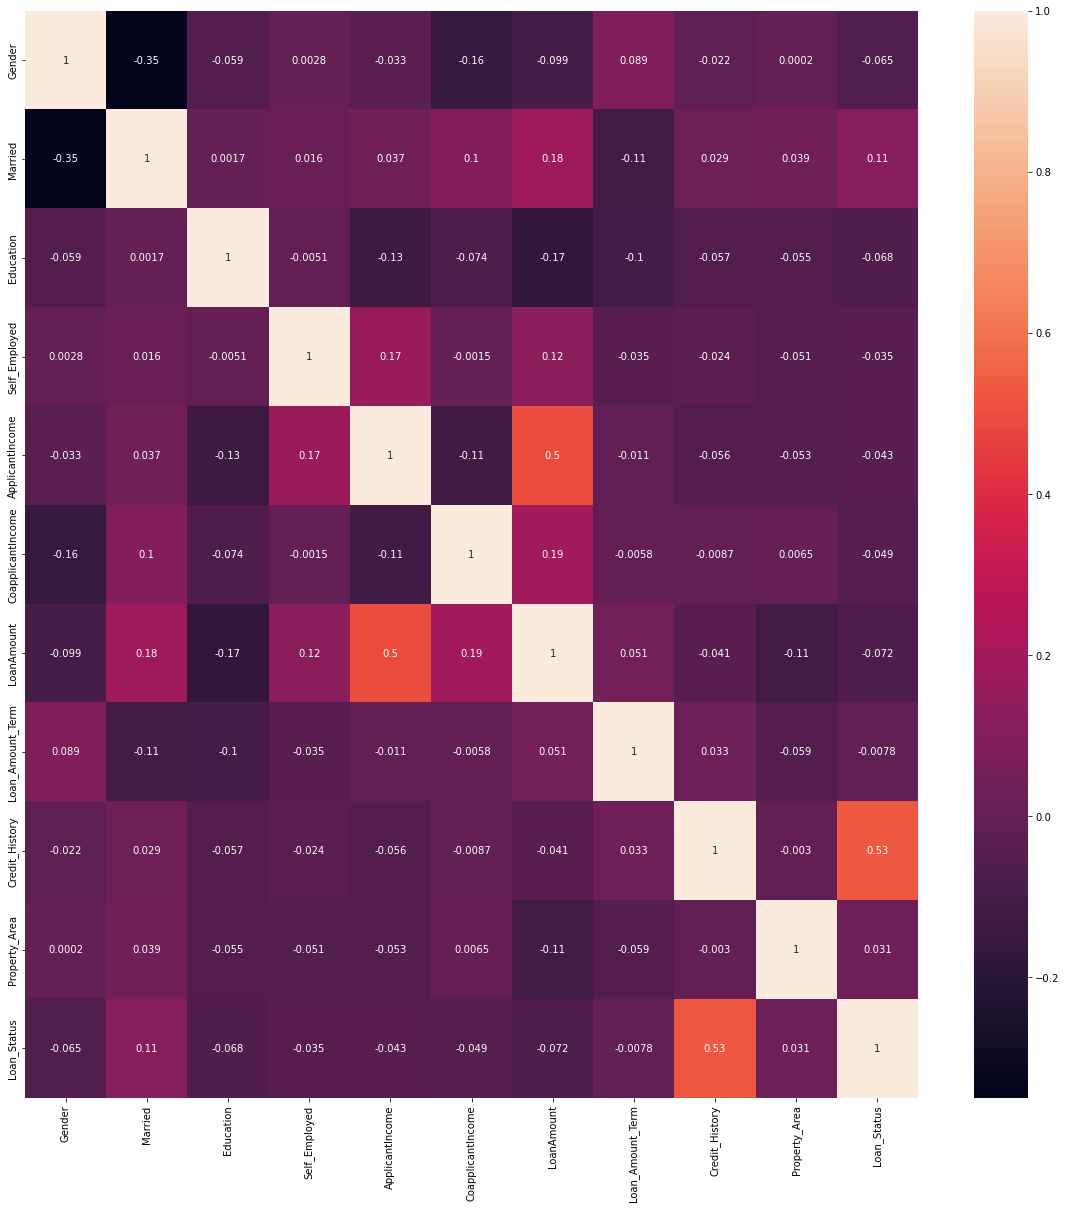

In [16]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)

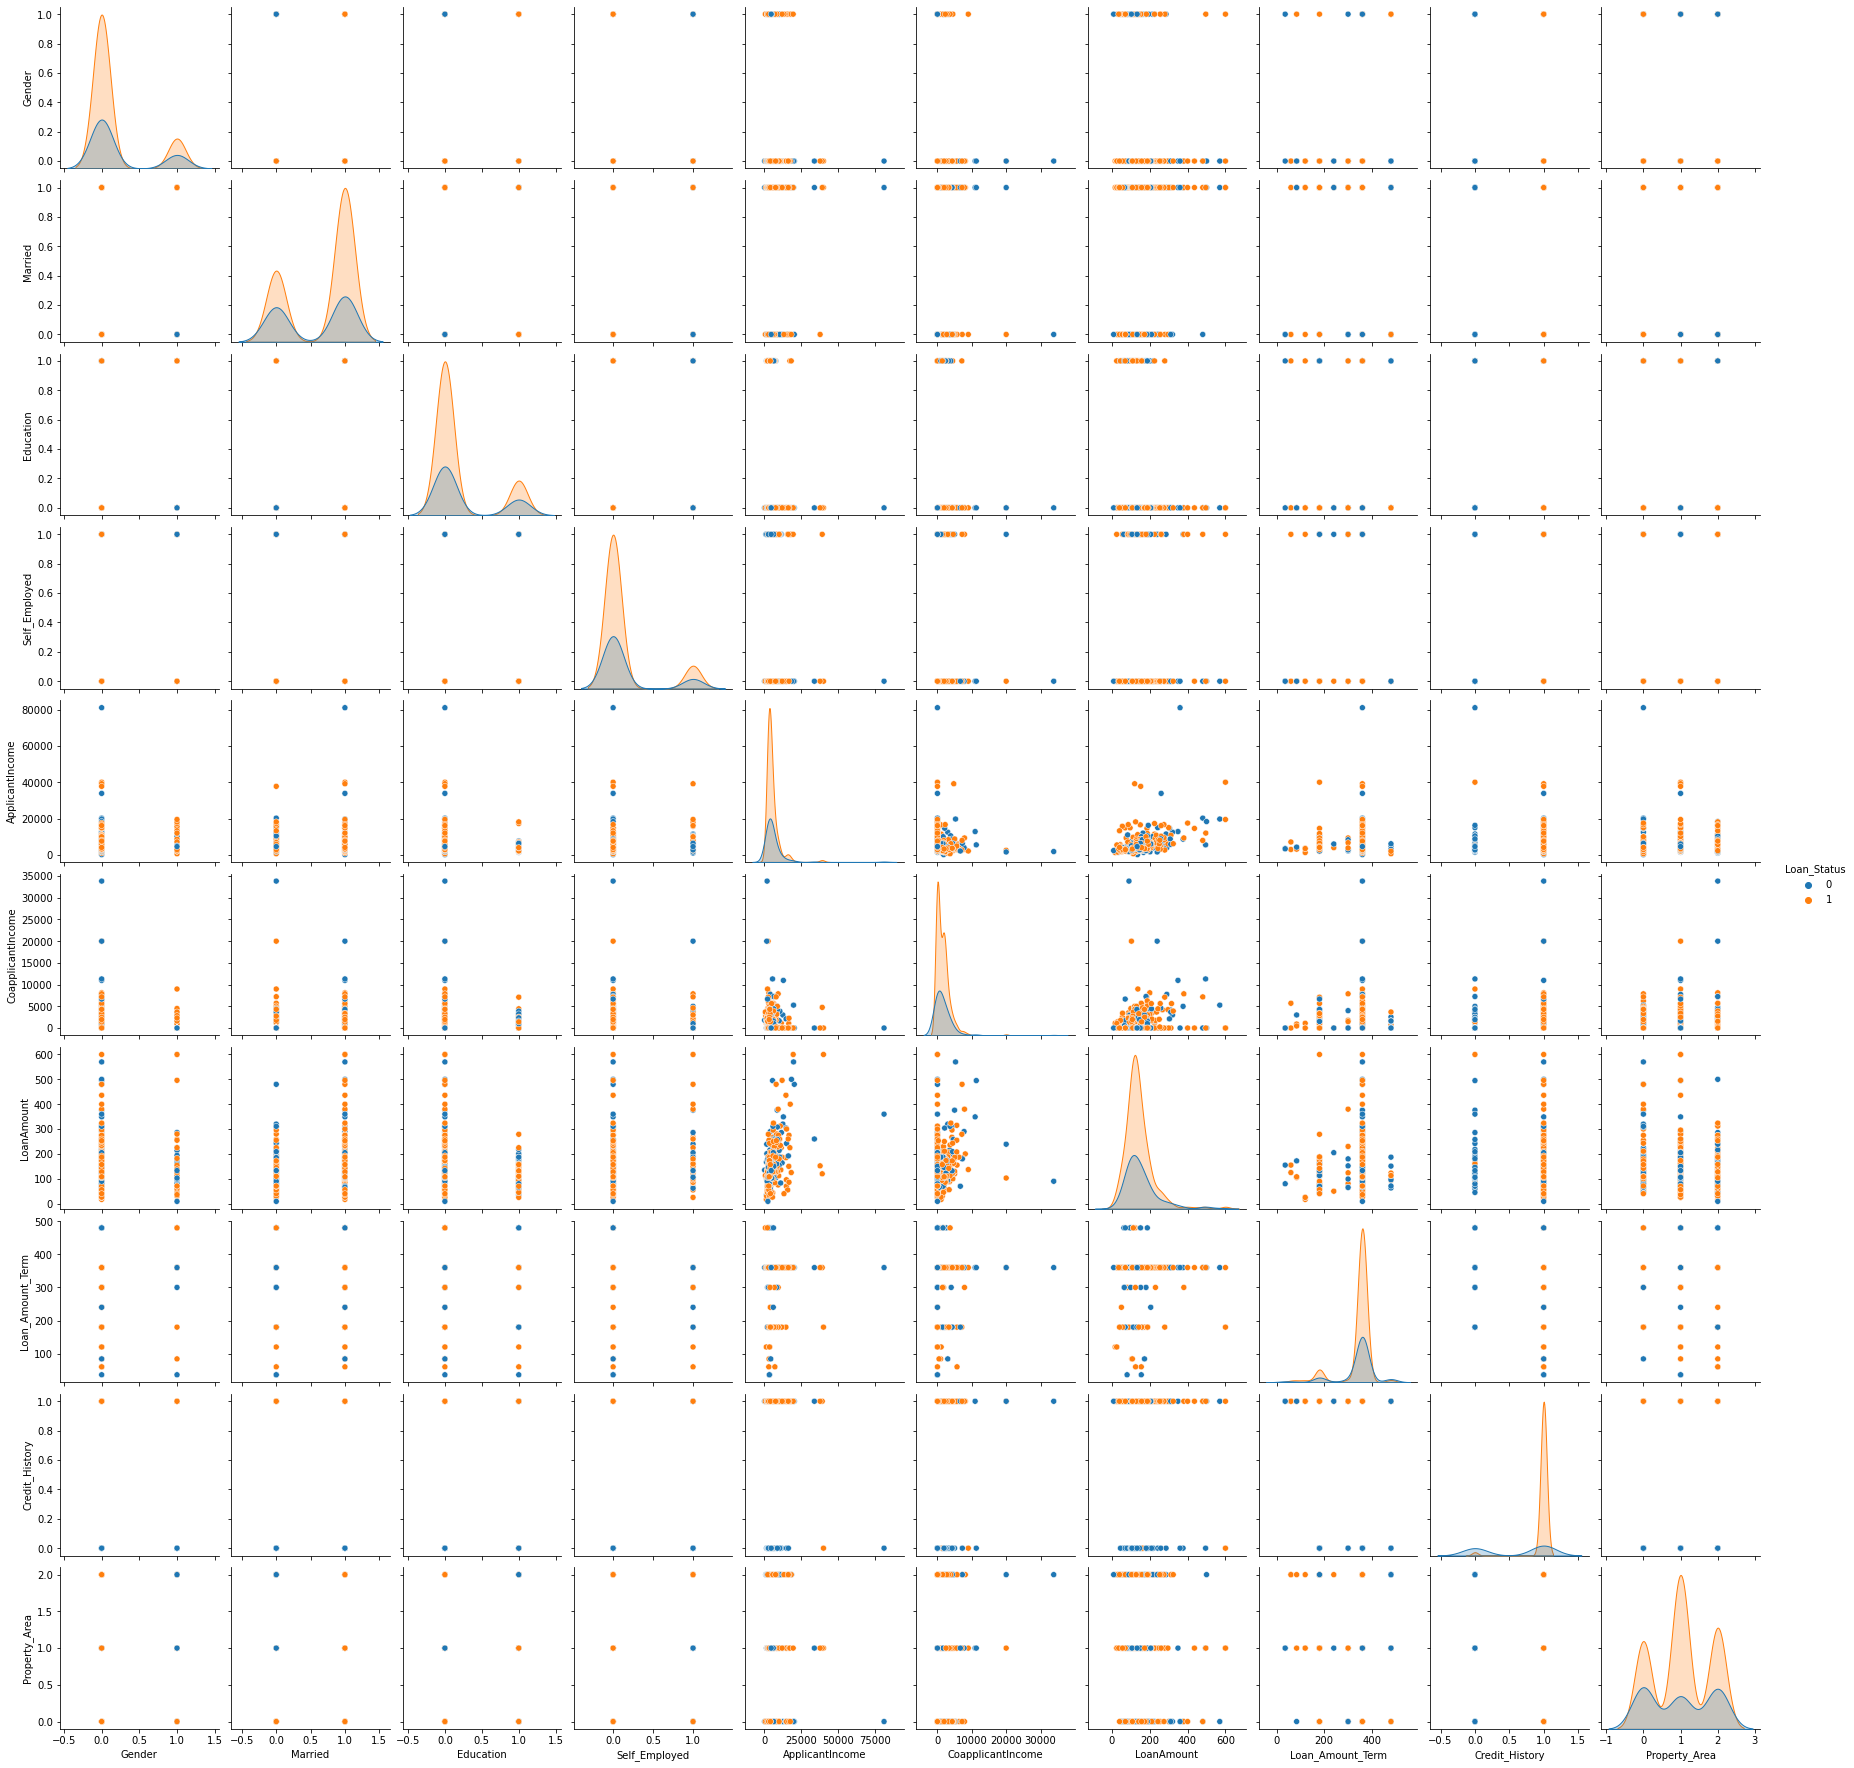

In [17]:
sns.pairplot(data=df, hue='Loan_Status')

<br>
<h1 style = "font-size:50px; font-family:Times New Roman ; font-weight : medium; background-color: #f1f5f8 ; color : #ff0000; text-align: center; border-radius: 120px 120px;">Data Model Selection</h1>
<br>

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
import pickle

In [19]:
data=df

In [20]:
data['Dependents'] = data['Dependents'].astype('str')

In [21]:
X = data[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome',
          'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']]
y = data['Loan_Status']


In [22]:
# Perform one-hot encoding for categorical features
encoder = OneHotEncoder(sparse=False, drop='first')
X_encoded = encoder.fit_transform(X.select_dtypes(include=['object', 'category']))
X_encoded = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(X.select_dtypes(include=['object', 'category']).columns))
X_numeric = pd.concat([X.select_dtypes(exclude=['object', 'category']), X_encoded], axis=1)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [24]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [25]:
y_pred = model.predict(X_test)

In [26]:
#accuracy = accuracy_score(y_test, y_pred)
#print("Accuracy:", accuracy)

In [27]:
import pickle

In [28]:
with open('loan_model.pkl', 'wb') as file:
    pickle.dump(model, file)

<br>
<h1 style = "font-size:50px; font-family:Times New Roman ; font-weight : medium; background-color: #f1f5f8 ; color : #ff0000; text-align: center; border-radius: 120px 120px;">Checking Accuracy of the Model</h1>
<br>

In [29]:
from sklearn.metrics import accuracy_score, classification_report
acc= accuracy_score(y_test, y_pred)
acc

0.7777777777777778

In [30]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.35      1.00      0.52        17
           1       1.00      0.75      0.86       127

    accuracy                           0.78       144
   macro avg       0.67      0.87      0.69       144
weighted avg       0.92      0.78      0.82       144



In [31]:
import pickle

with open('loan_model.pkl', 'wb') as file:
    pickle.dump(model, file)


In [32]:
# from pywebio.input import *
# from pywebio.output import *
# import pandas as pd
# # Load the model
# #with open('LinearRegression1.pkl', 'rb') as file:
#  #   model = pickle.load(file)
# # Load the trained model from pickle file
# with open('linear_regression_model.pkl', 'rb') as file:
#     pipe = pickle.load(file)
# # Input Group for Numeric Features
# inputs_numeric = input_group("Enter Numeric Features",
#                             [
#                                 input("male=0 & female=1", type='number', name='gender'),
#                                 input("yes=1 & no=0", type='number', name='married'),
#                                 input("how many member are dependent on you", type='number', name='dependency')
#                                 input("graduated=0 & un_graduated=1", type='number', name='Education')
#                                 input("no=0 & yes=1", type='number', name='Self_Employed')
#                                 input("type your income", type='number', name='ApplicantIncome')
#                                 input("type loan amount to take", type='number', name='LoanAmount')
#                                 input("type Loan_Amount_Term to take", type='number', name='Loan_Amount_Term')
#                                 input("type your credit history", type='number', name='Credit_History')
#                                 input("rural=0,semi_urbam=1,urban=2", type='number', name='Property_Area')
                                
                                
                                
#                             ])


# # Check for missing or invalid values
# if any(pd.isnull(inputs_numeric[feature]) for feature in inputs_numeric):
#     put_text("Please enter valid numeric values for all features.")
# else:
#     # Convert the input values to a DataFrame
#     input_data = pd.DataFrame(inputs_numeric, index=[0])

#     # Make the prediction using the trained model
#     prediction = model.predict(input_data)[0]

#     # Display the prediction
#     put_text("Loan Status Prediction:", "Approved" if prediction == 1 else "Not Approved")

    
    
    
    

    

In [33]:
# from pywebio.input import *
# from pywebio.output import *
# import pandas as pd
# import pickle

# # Load the trained model from the pickle file
# with open('loan_model.pkl', 'rb') as file:
#     model = pickle.load(file)

# # Input Group for Numeric Features
# inputs_numeric = input_group("Enter Numeric Features",
#                              [
#                                  input("Male=0 & Female=1", type='number', name='gender'),
#                                  input("Yes=1 & No=0", type='number', name='married'),
#                                  input("How many members are dependent on you", type='number', name='dependency'),
#                                  input("Graduated=0 & Ungraduated=1", type='number', name='education'),
#                                  input("No=0 & Yes=1", type='number', name='self_employed'),
#                                  input("Type your income", type='number', name='applicant_income'),
#                                  input("Type loan amount to take", type='number', name='loan_amount'),
#                                  input("Type Loan_Amount_Term to take", type='number', name='loan_amount_term'),
#                                  input("Type your credit history", type='number', name='credit_history'),
#                                  input("Rural=0, Semi-Urban=1, Urban=2", type='number', name='property_area')
#                              ])

# # Check for missing or invalid values
# if any(pd.isnull(inputs_numeric[feature]) for feature in inputs_numeric):
#     put_text("Please enter valid numeric values for all features.")
# else:
#     # Convert the input values to a DataFrame
#     input_data = pd.DataFrame(inputs_numeric, index=[0])

#     # Make the prediction using the trained model
#     prediction = model.predict(input_data)[0]

#     # Display the prediction
#     put_text("Loan Status Prediction:", "Approved" if prediction == 1 else "Not Approved")


In [34]:
# from pywebio.input import *
# from pywebio.output import *
# import pandas as pd
# import pickle

# # Load the trained model from the pickle file
# with open('loan_model.pkl', 'rb') as file:
#     model = pickle.load(file)

# # Input Group for Numeric Features
# # PyWebIO Interface
# inputs = input_group("Enter Loan Details",
#                      [
#                          input("Gender (0 for Male, 1 for Female)", type='number', name='gender'),
#                          input("Married (0 for No, 1 for Yes)", type='number', name='married'),
#                          input("Number of Dependents", type='number', name='dependents'),
#                          input("Education (0 for Graduate, 1 for Not Graduate)", type='number', name='education'),
#                          input("Self Employed (0 for No, 1 for Yes)", type='number', name='self_employed'),
#                          input("Applicant Income", type='number', name='applicant_income'),
#                          input("Co-applicant Income", type='number', name='coapplicant_income'),
#                          input("Loan Amount", type='number', name='loan_amount'),
#                          input("Loan Amount Term", type='number', name='loan_amount_term'),
#                          input("Credit History (0 for No, 1 for Yes)", type='number', name='credit_history'),
#                          input("Property Area (0 for Rural, 1 for Semiurban, 2 for Urban)", type='number', name='property_area')
#                      ])

# # Check for missing or invalid values
# if any(pd.isnull(inputs_numeric[feature]) for feature in inputs_numeric):
#     put_text("Please enter valid numeric values for all features.")
# else:
#     # Convert the input values to a DataFrame
#     input_data = pd.DataFrame(inputs_numeric, index=[0])

#     # Make the prediction using the trained model
#     prediction = model.predict(input_data)[0]

#     # Display the prediction
#     put_text("Loan Status Prediction:", "Approved" if prediction == 1 else "Not Approved")


In [35]:
from pywebio.input import *
from pywebio.output import *
import pandas as pd
import pickle

# Load the trained model from the pickle file
with open('loan_model.pkl', 'rb') as file:
    model = pickle.load(file)

# Input Group for Numeric Features
# PyWebIO Interface
inputs = input_group("Enter Loan Details",
                     [
                         input("Gender (0 for Male, 1 for Female)", type='number', name='gender'),
                         input("Married (0 for No, 1 for Yes)", type='number', name='married'),
                         input("Number of Dependents", type='number', name='dependents'),
                         input("Education (0 for Graduate, 1 for Not Graduate)", type='number', name='education'),
                         input("Self Employed (0 for No, 1 for Yes)", type='number', name='self_employed'),
                         input("Applicant Income", type='number', name='applicant_income'),
                         input("Co-applicant Income", type='number', name='coapplicant_income'),
                         input("Loan Amount", type='number', name='loan_amount'),
                         input("Loan Amount Term", type='number', name='loan_amount_term'),
                         input("Credit History (0 for No, 1 for Yes)", type='number', name='credit_history'),
                         input("Property Area (0 for Rural, 1 for Semiurban, 2 for Urban)", type='number', name='property_area')
                     ])

# Check for missing or invalid values
if any(pd.isnull(inputs[feature]) for feature in inputs):
    put_text("Please enter valid numeric values for all features.")
else:
    # Convert the input values to a DataFrame
    input_data = pd.DataFrame(inputs, index=[0])

    # Make the prediction using the trained model
    prediction = model.predict(input_data)[0]

    # Display the prediction
    put_text("Loan Status :", "Approved" if prediction == 1 else "Not Approved")


/Users/ayushsingh/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- applicant_income
- coapplicant_income
- credit_history
- dependents
- education
- ...
Feature names seen at fit time, yet now missing:
- ApplicantIncome
- CoapplicantIncome
- Credit_History
- Dependents
- Education
- ...

  warnings.warn(message, FutureWarning)


In [36]:
print(df.keys())

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')
